# Creación del conjunto de datos EmpathetiCounseling

### Instalación de las bibliotecas Transformers requeridas para el entrenamiento.

In [ ]:
!pip install datasets evaluate transformers[sentencepiece]
#!pip install transformers[torch]
!apt install git-lfs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.9 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!git config --global user.email "luisangel.motta@alumnos.viu.es"
!git config --global user.name "AngelMV97"

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

## Cargue de los dataset de asesoramiento terapéutico

Accedidos desde Hugging Face

In [ ]:
from datasets import load_dataset, DatasetDict, Dataset, concatenate_datasets

Amod = load_dataset("Amod/mental_health_counseling_conversations")
Psych8k = load_dataset("EmoCareAI/Psych8k")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

### Inspección y preparación de los datos.


Conjunto de datos Mental_health_counseling_conversations

In [ ]:
Amod

DatasetDict({
    train: Dataset({
        features: ['Context', 'Response'],
        num_rows: 3512
    })
})

In [ ]:
Amod['train'].features

{'Context': Value(dtype='string', id=None),
 'Response': Value(dtype='string', id=None)}

In [ ]:
# Renombra las columnas de entrada y etiqueta
Amod = Amod.rename_columns({"Context": "input", "Response": "label"})
Amod

DatasetDict({
    train: Dataset({
        features: ['input', 'label'],
        num_rows: 3512
    })
})

In [ ]:
Amod['train'][0]

{'input': "I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n   I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n   How can I change my feeling of being worthless to everyone?",
 'label': "If everyone thinks you're worthless, then maybe you need to find new people to hang out with.Seriously, the social context in which a person lives is a big influence in self-esteem.Otherwise, you can go round and round trying to understand why you're not worthless, then go back to the same crowd and be knocked down again.There are many inspirational messages you can find in social media. \xa0Maybe read some of the ones which state that no person is worthless, and that everyone has a good purpose to their life.Also, since our culture is so saturated with the belief that if someone doesn't feel good about themselves that this is somehow te

Conjunto de datos Psych8k

In [ ]:
Psych8k

DatasetDict({
    train: Dataset({
        features: ['input', 'output', 'instruction', 'instructions'],
        num_rows: 8187
    })
})

In [ ]:
Psych8k['train'].features

{'input': Value(dtype='string', id=None),
 'output': Value(dtype='string', id=None),
 'instruction': Value(dtype='string', id=None),
 'instructions': Value(dtype='string', id=None)}

In [ ]:
Psych8k['train'][3]

{'input': "Lately, I've been feeling a bit off. I've noticed that I've been having trouble concentrating at work, and I can't seem to shake off this feeling of sadness. I've lost interest in some activities I used to enjoy, like going out with friends. But, I don't have any hallucinations or hear voices. Recently, I also had a falling out with my best friend, and it's been difficult for me to understand their perspective. I tend to see things in black and white, but I don't think that others are out to get me or that I'm part of some conspiracy. These feelings have been going on for a few weeks now, and I just wanted to get some guidance on what might be going on.",
 'output': "Thank you for sharing your feelings and experiences with me. It's important to recognize when we are feeling off and seek help to better understand what's happening. From your description, you've mentioned some difficulties with concentrating and a decrease in interest in activities you previously enjoyed, as we

In [ ]:
# Renombra las columnas de entrada y etiqueta y elimina las restantes
Psych8k_list_columns = Psych8k['train'].column_names
Psych8k_no_removed_columns = ['input', 'output']
Psych8k_removed_columns = [column for column in Psych8k_list_columns if column not in Psych8k_no_removed_columns]
Psych8k = Psych8k.remove_columns(Psych8k_removed_columns)
Psych8k = Psych8k.rename_column("output", "label")
Psych8k

DatasetDict({
    train: Dataset({
        features: ['input', 'label'],
        num_rows: 8187
    })
})

Accedidos desde repositorios GitHub

Dataset Counsel-chat

In [ ]:
!git clone https://github.com/nbertagnolli/counsel-chat.git

Cloning into 'counsel-chat'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 50 (delta 20), reused 31 (delta 7), pack-reused 0
Receiving objects: 100% (50/50), 2.74 MiB | 7.41 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [ ]:
counsel = load_dataset("csv", data_files="/content/counsel-chat/data/20200325_counsel_chat.csv")

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
counsel

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'questionID', 'questionTitle', 'questionText', 'questionLink', 'topic', 'therapistInfo', 'therapistURL', 'answerText', 'upvotes', 'views', 'split'],
        num_rows: 2129
    })
})

In [ ]:
counsel['train'].features

{'Unnamed: 0': Value(dtype='int64', id=None),
 'questionID': Value(dtype='int64', id=None),
 'questionTitle': Value(dtype='string', id=None),
 'questionText': Value(dtype='string', id=None),
 'questionLink': Value(dtype='string', id=None),
 'topic': Value(dtype='string', id=None),
 'therapistInfo': Value(dtype='string', id=None),
 'therapistURL': Value(dtype='string', id=None),
 'answerText': Value(dtype='string', id=None),
 'upvotes': Value(dtype='int64', id=None),
 'views': Value(dtype='int64', id=None),
 'split': Value(dtype='string', id=None)}

In [ ]:
counsel['train'][1]

{'Unnamed: 0': 1,
 'questionID': 0,
 'questionTitle': 'Can I change my feeling of being worthless to everyone?',
 'questionText': "I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n   I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n   How can I change my feeling of being worthless to everyone?",
 'questionLink': 'https://counselchat.com/questions/can-i-change-my-feeling-of-being-worthless-to-everyone',
 'topic': 'depression',
 'therapistInfo': 'Robin Landwehr, DBH, LPCC, NCCMental Health in a Primary Care Setting',
 'therapistURL': 'https://counselchat.com/therapists/robin-landwehr-dbh-lpcc-ncc',
 'answerText': 'Hello, and thank you for your question and seeking advice on this. Feelings of worthlessness is unfortunately common. In fact, most people, if not all, have felt this to some degree at some point in their life. Yo

In [ ]:
# Renombra las columnas de entrada y etiqueta y elimina las restantes
counsel_list_columns = counsel['train'].column_names
counsel_no_removed_columns = ['questionText', 'answerText', 'topic']
counsel_removed_columns = [column for column in counsel_list_columns if column not in counsel_no_removed_columns]
counsel = counsel.remove_columns(counsel_removed_columns)
counsel = counsel.rename_columns({"questionText": "input", "answerText": "label"})
counsel

DatasetDict({
    train: Dataset({
        features: ['input', 'topic', 'label'],
        num_rows: 2129
    })
})

Conjunto de datos Emotional-Support-Conversation

In [ ]:
!git clone https://github.com/thu-coai/Emotional-Support-Conversation.git

Cloning into 'Emotional-Support-Conversation'...
remote: Enumerating objects: 812, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 812 (delta 27), reused 12 (delta 12), pack-reused 698
Receiving objects: 100% (812/812), 73.72 MiB | 32.43 MiB/s, done.
Resolving deltas: 100% (249/249), done.


In [ ]:
ESConv = load_dataset("json", data_files="/content/Emotional-Support-Conversation/ESConv.json", split='train')

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
ESConv

Dataset({
    features: ['survey_score', 'experience_type', 'situation', 'seeker_question1', 'dialog', 'supporter_question1', 'supporter_question2', 'seeker_question2', 'problem_type', 'emotion_type'],
    num_rows: 1300
})

In [ ]:
ESConv.features

{'survey_score': {'seeker': {'empathy': Value(dtype='string', id=None),
   'final_emotion_intensity': Value(dtype='string', id=None),
   'initial_emotion_intensity': Value(dtype='string', id=None),
   'relevance': Value(dtype='string', id=None)},
  'supporter': {'relevance': Value(dtype='string', id=None)}},
 'experience_type': Value(dtype='string', id=None),
 'situation': Value(dtype='string', id=None),
 'seeker_question1': Value(dtype='string', id=None),
 'dialog': [{'annotation': {'feedback': Value(dtype='string', id=None),
    'strategy': Value(dtype='string', id=None)},
   'content': Value(dtype='string', id=None),
   'speaker': Value(dtype='string', id=None)}],
 'supporter_question1': Value(dtype='string', id=None),
 'supporter_question2': Value(dtype='string', id=None),
 'seeker_question2': Value(dtype='string', id=None),
 'problem_type': Value(dtype='string', id=None),
 'emotion_type': Value(dtype='string', id=None)}

In [ ]:
# Requiere un poco más de preprocesamiento...
# Remueve las columnas no correspondientes al diálogo
ESConv_list_columns = ESConv.column_names
ESConv_no_removed_columns = ['dialog']
ESConv_removed_columns = [column for column in ESConv_list_columns if column not in ESConv_no_removed_columns]
ESConv = ESConv.remove_columns(ESConv_removed_columns)
ESConv

Dataset({
    features: ['dialog'],
    num_rows: 1300
})

In [ ]:
# Algunos diálogos los inicia el usuario y otros el "apoyador psicológico"
inicia_seeker = ESConv.filter(lambda x: x["dialog"][0]['speaker'] != 'supporter')
inicia_supporter = ESConv.filter(lambda x: x["dialog"][0]['speaker'] == 'supporter')

Filter:   0%|          | 0/1300 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1300 [00:00<?, ? examples/s]

In [ ]:
# Cada ejemplo es un diálogo entre el usuario y su apoyo
inicia_seeker

Dataset({
    features: ['dialog'],
    num_rows: 617
})

In [ ]:
inicia_supporter

In [ ]:
# Se toman únicamente los diálogos iniciados por el usuario
# Se crea una lista de apoyo para la formción de las tuplas input-label de cada ejemplo
speakers = []
for ex in inicia_seeker['dialog']:
  a = []
  for i in ex:
    a.append(i['speaker'])
  speakers.append(a)

assert len(speakers) == inicia_seeker.num_rows

In [ ]:
# Se crean los ejemplos con tuplas input-label
examples = []
for ex, example in enumerate(inicia_seeker['dialog']):
  speaker_example = speakers[ex]
  # índice del input=0; índice de la etiqueta=1 (debido a que el usuario inicia la conversación)
  i_input, i_label = 0, 1

  for _ in range(len(example)):
    if i_input >= len(example)-1: break # Slgunos diálogos también los termina el usuario, línea que es omitida
    if speaker_example[i_input] == speaker_example[i_input+1] == 'seeker': # Si el usuario interviene en dos líneas seguidas...
      input = example[i_input]['content'] + example[i_input+1]['content'] # ...se concatenan en una sola entrada
      i_input += 1
      i_label = i_input + 1
    else: input = example[i_input]['content']

    if i_label >= len(example)-1: break # Si llega al final de la conversación
    if speaker_example[i_label] == speaker_example[i_label+1] == 'supporter': # Si el apoyador interviene en dos líneas seguidas...
      label = example[i_label]['content'] + example[i_label+1]['content'] # ...se concatenan en una sola entrada
      i_label += 1
      i_input = i_label + 1
    else: label = example[i_label]['content']

    examples.append((input,label))
    i_input = i_label + 1
    i_label = i_input + 1

In [ ]:
# Breve inspección de los ejemplos resultantes
import pandas as pd
ESConv_dataset = pd.DataFrame(examples, columns=["input", "label"])
ESConv_dataset.head()

,input,label
0,Hello\n,"Hello, what would you like to talk about?"
1,I am having a lot of anxiety about quitting my...,What makes your job stressful for you?
2,I have to deal with many people in hard financ...,Do you help your clients to make it to a bette...
3,"I do, but often they are not going to get back...",But you offer them a better future than what t...
4,That is true but sometimes I feel like I shoul...,I can understand that. Is there another job th...


In [ ]:
# Creación del nuevo ddataset
ESConv = Dataset.from_pandas(ESConv_dataset)
ESConv

Dataset({
    features: ['input', 'label'],
    num_rows: 7130
})

Conjunto de datos Pair_data

In [ ]:
!tar -xzvf /content/PAIR.tgz

pair_data.csv


In [ ]:
pair_data = load_dataset("csv", data_files="/content/pair_data.csv", split='train')

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
pair_data

Dataset({
    features: ['prompt', 'hq1', 'hq2', 'mq1', 'lq1', 'lq2', 'lq3', 'lq4', 'lq5'],
    num_rows: 318
})

In [ ]:
# Cada ejemplo es compone de una entrada y distintas respuesta de acuerdo a un nivel de reflexión
pair_data[0]

{'prompt': 'I know I am too big, and I probably should exercise more and eat better, but I am so busy. I’ve got school, homework, and my job at the mall, so I don’t see anywhere to fit it in. Plus, I can’t afford any of those gyms. And none of my friends want to exercise with me. They’re lazier than I am.  ',
 'hq1': 'You are starting to think it’s time to do something about your weight, and you know exercise and eating a little better would help. But fitting it in, between school and work, seems almost impossible. The gym isn’t an option, and you can’t think of any friends who would work out with you. But it is something you are starting to think about.',
 'hq2': 'You have put a lot of effort into losing weight but it has not paid off. You are starting to feel a bit desperate. Diets don’t seem to work for you. You are looking for something different that might last.\r\n',
 'mq1': "You don't know how you'd fit exercise into your schedule.",
 'lq1': "It's free to exercise at home. Maybe

In [ ]:
# Se crean tuplas asignando la respectiva entrada, con los distintos niveles de respuesta
pair = []
for example in pair_data:
  pair.append((example['prompt'],example['hq1']))
  pair.append((example['prompt'],example['hq2']))
  pair.append((example['prompt'],example['mq1']))
  pair.append((example['prompt'],example['lq1']))
  pair.append((example['prompt'],example['lq2']))
  pair.append((example['prompt'],example['lq3']))
  pair.append((example['prompt'],example['lq4']))
  pair.append((example['prompt'],example['lq5']))
print('Nuevo número de ejemplos:', len(pair))

Nuevo número de ejemplos: 2544


In [ ]:
# Breve inspección de los ejemplos resultantes
pair_dataset = df = pd.DataFrame(pair, columns=["input", "label"])
pair_dataset.head()

,input,label
0,"I know I am too big, and I probably should exe...",You are starting to think it’s time to do some...
1,"I know I am too big, and I probably should exe...",You have put a lot of effort into losing weigh...
2,"I know I am too big, and I probably should exe...",You don't know how you'd fit exercise into you...
3,"I know I am too big, and I probably should exe...",It's free to exercise at home. Maybe ride your...
4,"I know I am too big, and I probably should exe...","Do you have a cheap gym near you, like a Plane..."


In [ ]:
# Creación del nuevo ddataset
pair_data = Dataset.from_pandas(pair_dataset)
pair_data

Dataset({
    features: ['input', 'label'],
    num_rows: 2544
})

Inspección de ejemplos nulos por cada dataet

In [ ]:
none_filter = lambda x: x["label"] == None or x["input"] == None
someAmod = Amod.filter(none_filter)
somePsych8k = Psych8k.filter(none_filter)
someCounsel = counsel.filter(none_filter)
someESConv = ESConv.filter(none_filter)
somePair = pair_data.filter(none_filter)

Filter:   0%|          | 0/3512 [00:00<?, ? examples/s]

Filter:   0%|          | 0/8187 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2129 [00:00<?, ? examples/s]

Filter:   0%|          | 0/7130 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2544 [00:00<?, ? examples/s]

In [ ]:
print(
    f"""Número de ejemplos con valores perdidos o nulos:
>>  Amod Dataset:        {someAmod.num_rows}
>>  Counsel Dataset:     {someCounsel.num_rows}
>>  Psych8k Dataset:     {somePsych8k.num_rows}
>>  ESConv Dataset:      {someESConv.num_rows}
    Pair Dataset:        {somePair.num_rows}"""
    )

Número de ejemplos con valores perdidos o nulos:
>>  Amod Dataset:        {'train': 0}
>>  Counsel Dataset:     {'train': 0}
>>  Psych8k Dataset:     {'train': 0}
>>  ESConv Dataset:                0
    Pair Dataset:                  0


Filtrar por ejemplos con respuestas mayores a dos palabras

In [ ]:
# Se omiten ejemplos con respuestas vacías, numéricas (no corresponden con la entrada)
# y respuestas simples como 'ok', 'no', 'yes', 'hi', 'bye', 'very good' y similares
response_filter = lambda x: len(x["label"]) > 10
Amod = Amod.filter(response_filter)
Psych8k = Psych8k.filter(response_filter)
counsel = counsel.filter(response_filter)
ESConv = ESConv.filter(response_filter)
pair_data = pair_data.filter(response_filter)

Filter:   0%|          | 0/3512 [00:00<?, ? examples/s]

Filter:   0%|          | 0/8187 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2129 [00:00<?, ? examples/s]

Filter:   0%|          | 0/7130 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2544 [00:00<?, ? examples/s]

### Inspección de datasets procesados

Aplicación de train-test split.

In [ ]:
Amod = Amod['train'].train_test_split(test_size=0.2, shuffle=True)
Psych8k = Psych8k['train'].train_test_split(test_size=0.2, shuffle=True)
ESConv = ESConv.train_test_split(test_size=0.2, shuffle=True)
pair_data = pair_data.train_test_split(test_size=0.2, shuffle=True)

In [ ]:
# Se hace un split por cada tema de conversación en el dataset Counsel-chat
topics = counsel['train'].unique('topic')
new_counsel = counsel.filter(lambda x: x["topic"] == topics[0])
new_counsel = new_counsel['train'].train_test_split(test_size=0.2, shuffle=True)
train_counsel = new_counsel['train']
test_counsel = new_counsel['test']
for topic in topics[1:]:
  new_counsel = counsel.filter(lambda x: x["topic"] == topic)
  new_counsel = new_counsel['train'].train_test_split(test_size=0.2, shuffle=True)
  train_counsel = concatenate_datasets([train_counsel, new_counsel['train']])
  test_counsel = concatenate_datasets([test_counsel, new_counsel['test']])

In [ ]:
Amod

DatasetDict({
    train: Dataset({
        features: ['input', 'label'],
        num_rows: 2804
    })
    test: Dataset({
        features: ['input', 'label'],
        num_rows: 701
    })
})

In [ ]:
Amod_train = Amod['train'].to_pandas()
Amod_test = Amod['test'].to_pandas()

# Calcula la longitud máxima y mínima de cada columna
max_lengths_train = Amod_train.apply(lambda x: x.str.len().max())
min_lengths_train = Amod_train.apply(lambda x: x.str.len().min())
max_lengths_test = Amod_test.apply(lambda x: x.str.len().max())
min_lengths_test = Amod_test.apply(lambda x: x.str.len().min())
# Conjunto de train
Amod_train.head()

,input,label
0,I just took a job that requires me to travel f...,hmm this is a tough one!
1,My partner and I have had an amazing relations...,"I wonder how long ""anymore"" will be for your b..."
2,I just need to know if I'm really crazy or not.,Do an internet research on psychosis symptoms ...
3,What makes a healthy marriage last?,This answer varies based on you relationship. ...
4,My grandma had a stroke and passed away recent...,Please practice being kind to yourself!! You l...


In [ ]:
Amod_train.describe()

,input,label
count,2804,2804
unique,929,2149
top,I have so many issues to address. I have a his...,It takes a lot of courage to go to therapy. I...
freq,73,3


In [ ]:
# Conjunto de test
Amod_test.head()

,input,label
0,I find myself being very outgoing most of the ...,Would you feel more secure in conversations if...
1,I'm a male in my 20s. My girlfriend is in her ...,Are you possibly mixing up an impulse to nurtu...
2,Does this go against any ethical codes? Are th...,"Generally, the ethical codes only prohibit rel..."
3,"I'm a female freshman in high school, and this...","First off, I think it is great that you are wi..."
4,How does a counselor decide when to end counse...,Counseling ends when the client has received t...


In [ ]:
Amod_test.describe()

,input,label
count,701,701
unique,448,656
top,I have so many issues to address. I have a his...,How is your boyfriend responding to your disco...
freq,21,2


##### Función de graficación

In [ ]:
import matplotlib.pyplot as plt

def plot_dataset(name_dataset: str, name_image: str):
    width = 0.5  # the width of the bars

    longitudes_train = {
        'Input': (max_lengths_train.values[0],min_lengths_train.values[0]),
        'Label': (max_lengths_train.values[1],min_lengths_train.values[1])
    }
    longitudes_test = {
        'Input': (max_lengths_test.values[0],min_lengths_test.values[0]),
        'Label': (max_lengths_test.values[1],min_lengths_test.values[1])
    }

    fig, axs = plt.subplots(1, 2, layout='constrained')

    for key, value in longitudes_train.items():
        rects = axs[0].bar(key, value, width, color='orange')
        axs[0].bar_label(rects, padding=2)

    for key, value in longitudes_test.items():
        rects = axs[1].bar(key, value, width, color='gray')
        axs[1].bar_label(rects, padding=2)

    # Establecer etiquetas y título
    axs[0].set_title('Conjunto de Train')
    axs[0].set_xlabel('Columnas')
    axs[0].set_ylabel('Longitud')
    axs[1].set_title('Conjunto de Test')
    axs[1].set_xlabel('Columnas')
    fig.suptitle(f'Longitud máxima y mínima en {name_dataset} Dataset')

    # Mostrar gráfico
    plt.savefig(f"figures/{name_image}.png")
    plt.show()

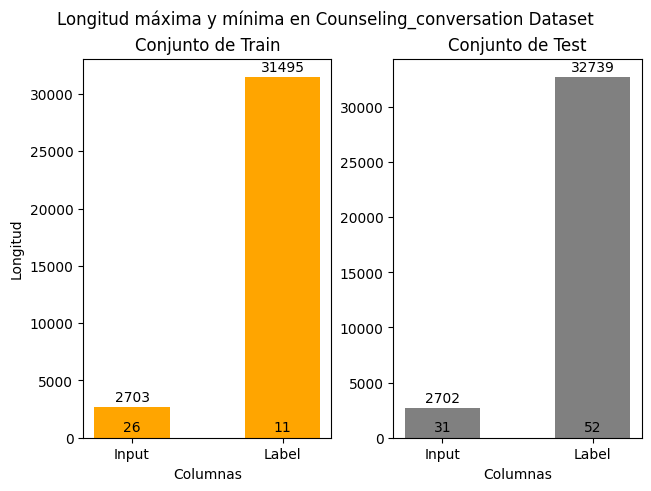

In [ ]:
plot_dataset('Counseling_conversation', 'Amod_dataset')

In [ ]:
Psych8k

DatasetDict({
    train: Dataset({
        features: ['input', 'label'],
        num_rows: 6549
    })
    test: Dataset({
        features: ['input', 'label'],
        num_rows: 1638
    })
})

In [ ]:
Psych8k_train = Psych8k['train'].to_pandas()
Psych8k_test = Psych8k['test'].to_pandas()

# Calcula la longitud máxima y mínima de cada columna
max_lengths_train = Psych8k_train.apply(lambda x: x.str.len().max())
min_lengths_train = Psych8k_train.apply(lambda x: x.str.len().min())
max_lengths_test = Psych8k_test.apply(lambda x: x.str.len().max())
min_lengths_test = Psych8k_test.apply(lambda x: x.str.len().min())

# Conjunto de train
Psych8k_train.head()

,input,label
0,"I've been feeling really down lately, and I th...",I can understand how failing an exam can be di...
1,I was just saying that the problem was my frie...,It's great to hear that your friends have impr...
2,"I'm doing a little better. Uhm, we kept trying...",I'm glad to hear that you're doing better with...
3,I am struggling with completing chores and rem...,I understand you're having trouble with memory...
4,I went to a competition and saw that the other...,It's understandable to feel discouraged when c...


In [ ]:
Psych8k_train.describe()

,input,label
count,6549,6549
unique,6549,6549
top,"I've been feeling really down lately, and I th...",I can understand how failing an exam can be di...
freq,1,1


In [ ]:
# Conjunto de test
Psych8k_test.head()

,input,label
0,I've been struggling with trust issues because...,It seems like you've created a mechanism to co...
1,"I really want to do it this time, but I don't ...",It's great to see that you want to make a sinc...
2,I used to be so proud of myself and so sure th...,It seems like that critical voice is your depr...
3,"I didn't let myself get too isolated, but sinc...",It's good to hear that you haven't isolated yo...
4,I have this talent and I want to find a way fo...,You don't necessarily need a degree to monetiz...


In [ ]:
Psych8k_test.describe()

,input,label
count,1638,1638
unique,1638,1638
top,I've been struggling with trust issues because...,It seems like you've created a mechanism to co...
freq,1,1


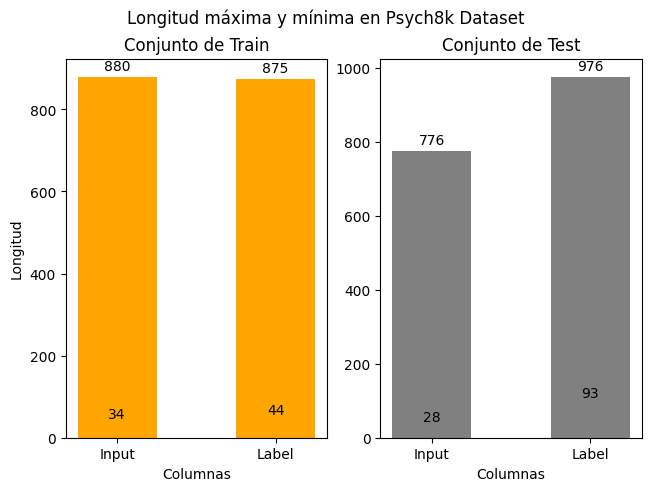

In [ ]:
plot_dataset('Psych8k', 'Psych8k')

In [ ]:
counsel

DatasetDict({
    train: Dataset({
        features: ['input', 'label'],
        num_rows: 1701
    })
    test: Dataset({
        features: ['input', 'label'],
        num_rows: 426
    })
})

In [ ]:
train_counsel = train_counsel.remove_columns(['topic'])
train_counsel

Dataset({
    features: ['input', 'label'],
    num_rows: 1689
})

In [ ]:
test_counsel = test_counsel.remove_columns(['topic'])
test_counsel

Dataset({
    features: ['input', 'label'],
    num_rows: 438
})

In [ ]:
counsel_train = train_counsel.to_pandas()
counsel_test = test_counsel.to_pandas()

# Calcula la longitud máxima y mínima de cada columna
max_lengths_train = counsel_train.apply(lambda x: x.str.len().max())
min_lengths_train = counsel_train.apply(lambda x: x.str.len().min())
max_lengths_test = counsel_test.apply(lambda x: x.str.len().max())
min_lengths_test = counsel_test.apply(lambda x: x.str.len().min())
# Conjunto de train
counsel_train.head()

,input,label
0,I struggle with depression as well as pretty i...,You may already be living a balanced life beca...
1,I've never been able to talk with my parents. ...,"First, thank you for sharing such deep persona..."
2,I'm a teenager. My dad has been jail for the l...,It sounds like you have a lot of weight on you...
3,"I have a lot on my mind, but all I want to do ...",It has been said that depression is often the ...
4,I've never been able to talk with my parents. ...,"I'm sorry you feel so alone and isolated, thos..."


In [ ]:
counsel_train.describe()

,input,label
count,1689,1689
unique,713,1613
top,I have so many issues to address. I have a his...,It is absolutely a typical response. Many of ...
freq,69,2


In [ ]:
# Conjunto de test
counsel_test.head()

,input,label
0,"When I'm sad and alone, I want to cut myself.",Try doing something physical. If you haven't e...
1,I have so many issues to address. I have a his...,It could be said that you might be the perfect...
2,I have so many issues to address. I have a his...,"Yeah, you might :)At least, it certainly feels..."
3,I am pretty sure I have depression and anxiety...,What stops you now from telling your parents t...
4,I've had posttraumatic stress disorder for yea...,Post traumatic stress disorder (PTSD) is a ver...


In [ ]:
counsel_test.describe()

,input,label
count,438,438
unique,290,431
top,I have so many issues to address. I have a his...,It takes a lot of courage to go to therapy. I...
freq,25,2


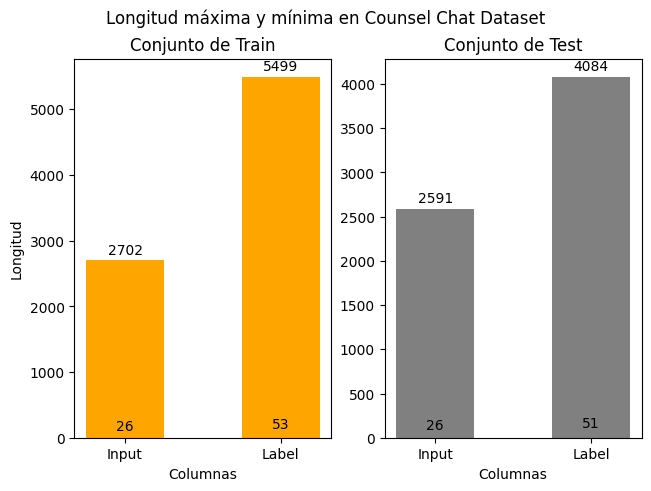

In [ ]:
plot_dataset('Counsel Chat', 'Counsel_chat')

In [ ]:
ESConv

DatasetDict({
    train: Dataset({
        features: ['input', 'label'],
        num_rows: 5602
    })
    test: Dataset({
        features: ['input', 'label'],
        num_rows: 1401
    })
})

In [ ]:
ESConv_train = ESConv['train'].to_pandas()
ESConv_test = ESConv['test'].to_pandas()

# Calcula la longitud máxima y mínima de cada columna
max_lengths_train = ESConv_train.apply(lambda x: x.str.len().max())
min_lengths_train = ESConv_train.apply(lambda x: x.str.len().min())
max_lengths_test = ESConv_test.apply(lambda x: x.str.len().max())
min_lengths_test = ESConv_test.apply(lambda x: x.str.len().min())
# Conjunto de train
ESConv_train.head()

,input,label
0,I've been trying to look on job boards and com...,I would also encourage you to get outside and ...
1,Yes it is\nI'd rather just run away from every...,"It's not cool that you're sibling lied, but it..."
2,Ok. That makes sense. There is a large pot. I ...,"yes, starting with the large pot would be a gr..."
3,"As I said above, my youngest son is difficult....",oh! did you try to make friendship with him?
4,how are you today\n,"Good, how are you?"


In [ ]:
ESConv_train.describe()

,input,label
count,5602,5602
unique,5408,5550
top,Hello\n,Hello! How are you doing today?
freq,45,6


In [ ]:
# Conjunto de test
ESConv_test.head()

,input,label
0,I may start looking on Monday to see what's ou...,"Consider making your plan of action, regardles..."
1,my stress very high,"Whenever I am stressed, I like to go for a wal..."
2,You can't just stay home all day as you cant ...,"When the pandemic first started, I felt like I..."
3,Wonderful! My job is causing me some stress an...,"I see, so you have difficulty dealing with a c..."
4,thankscan i finish the conversation,Yes of course! I hope you have a good day! :)


In [ ]:
ESConv_test.describe()

,input,label
count,1401,1401
unique,1374,1398
top,Hello\n,"Hello, how can i help you today?"
freq,8,2


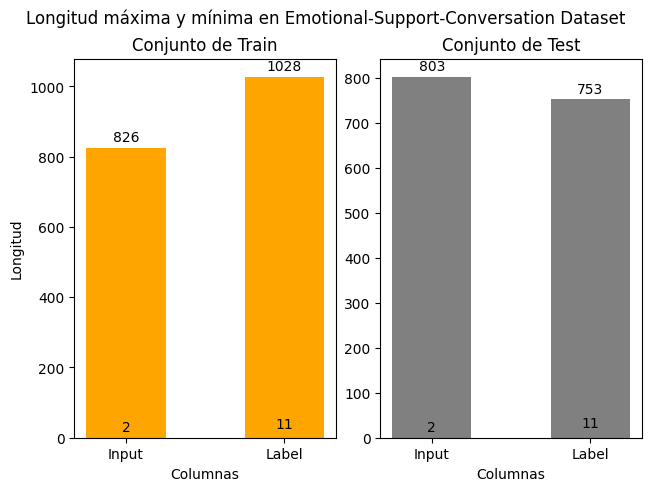

In [ ]:
plot_dataset('Emotional-Support-Conversation', 'ESConv')

In [ ]:
pair_data

DatasetDict({
    train: Dataset({
        features: ['input', 'label'],
        num_rows: 2016
    })
    test: Dataset({
        features: ['input', 'label'],
        num_rows: 505
    })
})

In [ ]:
pair_data_train = pair_data['train'].to_pandas()
pair_data_test = pair_data['test'].to_pandas()

# Calcula la longitud máxima y mínima de cada columna
max_lengths_train = pair_data_train.apply(lambda x: x.str.len().max())
min_lengths_train = pair_data_train.apply(lambda x: x.str.len().min())
max_lengths_test = pair_data_test.apply(lambda x: x.str.len().max())
min_lengths_test = pair_data_test.apply(lambda x: x.str.len().min())
# Conjunto de train
pair_data_train.head()

,input,label
0,The damn pharmacists won’t fill my vicodin bec...,You feel blown off by the pharmacists. You wis...
1,"Look at you, were you ever heavy? How can you ...",What's at issue here is how you feel about you...
2,I’ve done everything I’m supposed to do in thi...,Sometimes the progress made is not on the scal...
3,I used to be really active. Played tennis in ...,Nobody expects you to be an elite athlete at y...
4,On weekends I love having a few joints and chi...,"Relaxing is good, as long as they are all thin..."


In [ ]:
pair_data_train.describe()

,input,label
count,2016,2016
unique,318,2013
top,"Well, how am I supposed to cook red beans and ...","After a busy week, you really need an outlet -..."
freq,8,2


In [ ]:
# Conjunto de test
pair_data_test.head()

,input,label
0,If I sign up to be an organ donor and I’m in a...,You're worried that doctors won't do everythin...
1,"I am still working, as I am the sole bread win...",The weight of your family and the family finan...
2,I heard that you have to eliminate all carbs i...,You're interested in learning more about losin...
3,"I heard the blended, ground up bull is the wor...",Staying away from the most harmful bull is a d...
4,"Now that I have stopped smoking, I will never ...",it is a good decision .please follow it your e...


In [ ]:
pair_data_test.describe()

,input,label
count,505,505
unique,263,504
top,I switched from smoking tobacco to chewing it ...,You have put a lot of effort into losing weigh...
freq,5,2


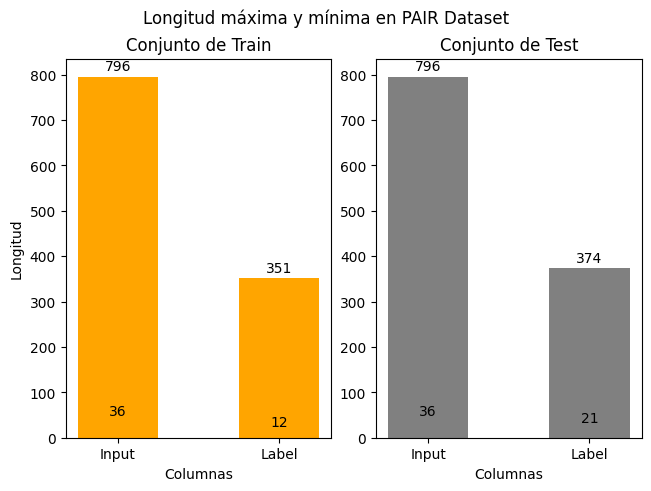

In [ ]:
plot_dataset('PAIR', 'pair_data')

Concatenación de datasets en uno único.

In [ ]:
# Datasets de asesorameinto médico (terapéutico).
train_dataset = concatenate_datasets([Amod['train'], train_counsel, Psych8k['train'], ESConv['train'], pair_data['train']])
test_dataset = concatenate_datasets([Amod['test'], test_counsel, Psych8k['test'], ESConv['test'], pair_data['test']])
train_dataset

Dataset({
    features: ['input', 'label'],
    num_rows: 18660
})

In [ ]:
test_dataset

Dataset({
    features: ['input', 'label'],
    num_rows: 4683
})

In [ ]:
# Se tendrán 60.000 ejemplos con 40% de asesoramiento médico y 60% de respuestas empáticas
num_rows_counseling = train_dataset.num_rows + test_dataset.num_rows
print(f"""
Ejemplos de asesoramiento médico: {num_rows_counseling}
Ejemplos de respuesta empática: {60000 - num_rows_counseling}
      """)


Ejemplos de asesoramiento médico: 23343
Ejemplos de respuesta empática: 36657
      


### Cargue del dataset para el entrenamiento con respuestas empáticas.

In [ ]:
# Cargue del dataset
raw_datasets = load_dataset("empathetic_dialogues")

Generating train split:   0%|          | 0/76673 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/12030 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10943 [00:00<?, ? examples/s]

### Inspección y preparación de los datos.

In [ ]:
# Contenido del dataset
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['conv_id', 'utterance_idx', 'context', 'prompt', 'speaker_idx', 'utterance', 'selfeval', 'tags'],
        num_rows: 76673
    })
    validation: Dataset({
        features: ['conv_id', 'utterance_idx', 'context', 'prompt', 'speaker_idx', 'utterance', 'selfeval', 'tags'],
        num_rows: 12030
    })
    test: Dataset({
        features: ['conv_id', 'utterance_idx', 'context', 'prompt', 'speaker_idx', 'utterance', 'selfeval', 'tags'],
        num_rows: 10943
    })
})

In [ ]:
# Visualización de un ejemplo
raw_datasets['train'][10]

{'conv_id': 'hit:1_conv:2',
 'utterance_idx': 5,
 'context': 'afraid',
 'prompt': ' i used to scare for darkness',
 'speaker_idx': 2,
 'utterance': ' i virtually thought so.. and i used to get sweatings',
 'selfeval': '4|3|4_3|5|5',
 'tags': ''}

In [ ]:
#Renombra la columna de las etiquetas y elimina las columnas innecesarias
raw_datasets = raw_datasets.remove_columns(['conv_id', 'utterance_idx', 'speaker_idx', 'selfeval', 'tags'])
raw_datasets = raw_datasets.rename_columns({"prompt": "input", "utterance": "label"})

In [ ]:
# Conjunto de entrenamiento resultante tras las modificaciones
raw_train_dataset = raw_datasets['train']
print('Características del conjunto de entrenamiento:')
print()
raw_train_dataset.features

Características del conjunto de entrenamiento:



{'context': Value(dtype='string', id=None),
 'input': Value(dtype='string', id=None),
 'label': Value(dtype='string', id=None)}

Filtración de ejemplos con respuestas mayores a dos palabras

In [ ]:
raw_train_cleaned = raw_datasets['train'].filter(lambda x: len(x["input"]) > 10 and len(x["label"]) > 10)
raw_eval_cleaned = raw_datasets['validation'].filter(lambda x: len(x["input"]) > 10 and len(x["label"]) > 10)

Filter:   0%|          | 0/76673 [00:00<?, ? examples/s]

Filter:   0%|          | 0/12030 [00:00<?, ? examples/s]

In [ ]:
raw_train_cleaned

Dataset({
    features: ['context', 'input', 'label'],
    num_rows: 75711
})

In [ ]:
raw_eval_cleaned

Dataset({
    features: ['context', 'input', 'label'],
    num_rows: 11865
})

In [ ]:
# Se hace un split por cada tema de conversación en el dataset Counsel-chat
emotions = raw_datasets['train'].unique('context')
num_emo = len(emotions)
new_train = raw_train_cleaned.filter(lambda x: x["context"] == 'surprised')
new_eval = raw_eval_cleaned.filter(lambda x: x["context"] == 'surprised')
train_range = 29326//num_emo
eval_range = 7331//num_emo
emotions.remove('surprised')
# Se toma un conjunto menor para mayor balance entre los datasets
small_train_dataset = new_train.shuffle(seed=42).select(range(train_range+14))
small_eval_dataset = new_eval.shuffle(seed=42).select(range(eval_range+23))
for emotion in emotions:
  new_train = raw_train_cleaned.filter(lambda x: x["context"] == emotion)
  if new_train.num_rows > train_range:
    new_train = new_train.shuffle(seed=42).select(range(train_range))
  new_eval = raw_eval_cleaned.filter(lambda x: x["context"] == emotion)
  if new_eval.num_rows > eval_range:
    new_eval = new_eval.shuffle(seed=42).select(range(eval_range))
  small_train_dataset = concatenate_datasets([small_train_dataset, new_train])
  small_eval_dataset = concatenate_datasets([small_eval_dataset, new_eval])

Filter:   0%|          | 0/75711 [00:00<?, ? examples/s]

Filter:   0%|          | 0/11865 [00:00<?, ? examples/s]

In [ ]:
small_train_dataset = small_train_dataset.remove_columns(['context'])
small_eval_dataset = small_eval_dataset.remove_columns(['context'])
small_train_dataset

Dataset({
    features: ['input', 'label'],
    num_rows: 29326
})

In [ ]:
small_eval_dataset

Dataset({
    features: ['input', 'label'],
    num_rows: 7331
})

### Inspección de datasets procesados

In [ ]:
small_train = small_train_dataset.to_pandas()
small_eval = small_eval_dataset.to_pandas()

# Calcula la longitud máxima y mínima de cada columna
max_lengths_train = small_train.apply(lambda x: x.str.len().max())
min_lengths_train = small_train.apply(lambda x: x.str.len().min())
max_lengths_test = small_eval.apply(lambda x: x.str.len().max())
min_lengths_test = small_eval.apply(lambda x: x.str.len().min())
# Conjunto de train
small_train.head()

In [ ]:
small_train.describe()

In [ ]:
# Conjunto de test
small_eval.head()

In [ ]:
small_eval.describe()

In [ ]:
plot_dataset('Empathetic Dialogues', 'empathetic_dialogues')

Concatenación completa en un único dataset.

In [ ]:
# Concatenación completa
train_dataset_full = concatenate_datasets([train_dataset, small_train_dataset])
test_dataset_full = concatenate_datasets([test_dataset, small_eval_dataset])

In [ ]:
# Aplica un shuffle a los datasets resultantes
train_dataset_full = train_dataset_full.shuffle(seed=42)
test_dataset_full = test_dataset_full.shuffle(seed=42)

In [ ]:
train_dataset_full

In [ ]:
test_dataset_full

In [ ]:
data_files = {"train": train_dataset_full, "test": test_dataset_full}
dataset_full = DatasetDict(data_files)
dataset_full

In [ ]:
dataset_full['test'].features

In [ ]:
dataset_full_train = dataset_full['train'].to_pandas()
dataset_full_test = dataset_full['test'].to_pandas()

# Calcula la longitud máxima y mínima de cada columna
max_lengths_train = dataset_full_train.apply(lambda x: x.str.len().max())
min_lengths_train = dataset_full_train.apply(lambda x: x.str.len().min())
max_lengths_test = dataset_full_test.apply(lambda x: x.str.len().max())
min_lengths_test = dataset_full_test.apply(lambda x: x.str.len().min())

dataset_full_train.head()

In [ ]:
dataset_full_train.describe()

In [ ]:
dataset_full_test.head()

In [ ]:
dataset_full_test.describe()

In [ ]:
plot_dataset('EmpathetiCounseling', 'Empathetic_counseling')

Cargue del dataset en el repositorio de Hugging Face

In [ ]:
dataset_full.push_to_hub("LuangMV97/EmpathetiCounseling_Dataset")